### Initialization and Loading data

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("clean_data.csv").drop("Unnamed: 0", axis=1)
data_features = data.drop(
    labels=["rank_display", "rank_display_raw", "score", "class"],
    axis=1
)

### General informations



In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6109 entries, 0 to 6108
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university_with_year    6109 non-null   object 
 1   rank_display            6109 non-null   int64  
 2   rank_display_raw        6109 non-null   float64
 3   score                   2634 non-null   float64
 4   country                 6109 non-null   int64  
 5   city                    6109 non-null   int64  
 6   region                  6109 non-null   int64  
 7   type                    6109 non-null   int64  
 8   research_output         6109 non-null   int64  
 9   student_faculty_ratio   6109 non-null   float64
 10  international_students  6109 non-null   float64
 11  size                    6109 non-null   int64  
 12  faculty_count           6109 non-null   float64
 13  class                   6109 non-null   float64
dtypes: float64(6), int64(7), object(1)
memor

#### Classes distribution

In [ ]:
ax = sns.countplot(x="class", data=data)
ax.set_xticklabels(["0", "1", "2", "3", "4", "5", "6", "7", "8", "10", "12"])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

### Correlation

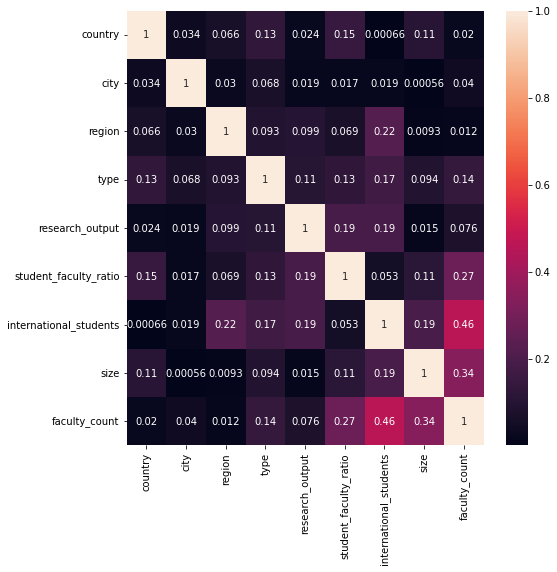

In [14]:
data_corr = data_features.corr()
plt.figure(figsize = (8,8))
sns.heatmap(abs(data_corr), annot = True)
plt.show()

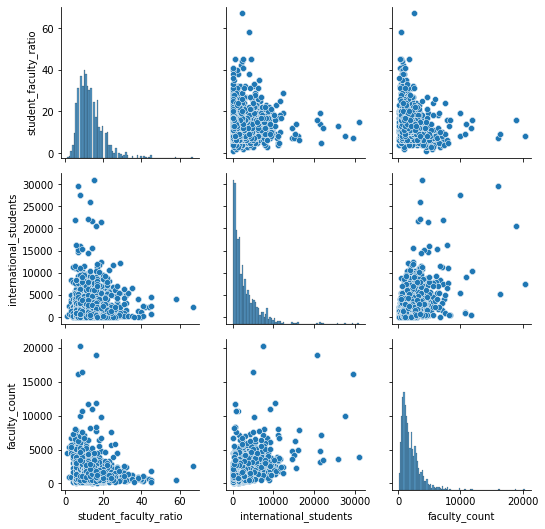

In [18]:
correlated_features = [
    "student_faculty_ratio",
    "international_students",
    "faculty_count"
]

g = sns.PairGrid(data_features[correlated_features])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [20]:
data.dtypes

university_with_year       object
rank_display                int64
rank_display_raw          float64
score                     float64
country                     int64
city                        int64
region                      int64
type                        int64
research_output             int64
student_faculty_ratio     float64
international_students    float64
size                        int64
faculty_count             float64
class                     float64
dtype: object